# Mall Customer Segmentation Data

## 1. imports 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the Data
Read the data using read_excel() function from pandas

In [46]:
KM = pd.read_csv(r"C:\Users\sonic\Downloads\Mall_Customers.csv")

In [47]:
KM.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Data Types and Dimensions

In [48]:
KM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
KM.shape

(200, 5)

In [50]:
KM.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Distribution of Variables

#### 
2. Distribution of of gender 

C:\Users\sonic\AppData\Local\Temp\ipykernel_11500\3625426409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=KM, x='Gender', palette=['#C9E4CA', '#F7D2C4'])


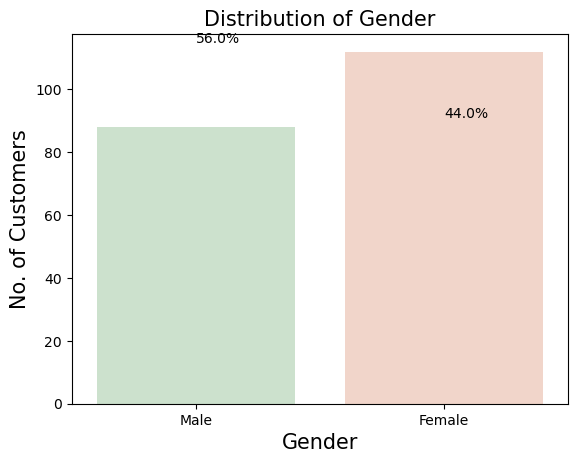

In [51]:
sns.countplot(data=KM, x='Gender', palette=['#C9E4CA', '#F7D2C4'])
plt.title('Distribution of Gender', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('No. of Customers', fontsize=15)

# Calculate percentages and add labels
for i, count in enumerate(KM['Gender'].value_counts()):
    plt.text(x=i, y=count + 3, s=f"{round(count*100/len(KM['Gender']), 2)}%")

plt.show()



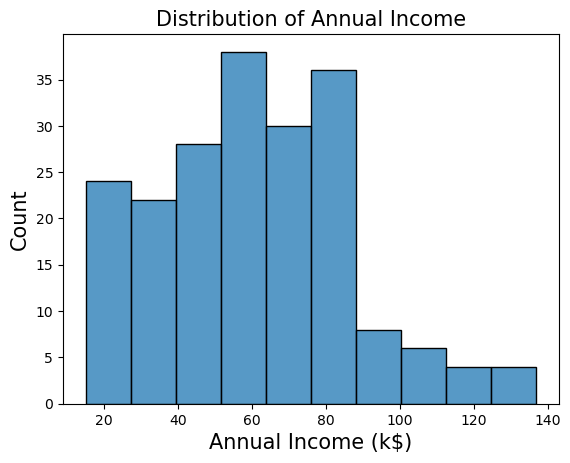

In [52]:
sns.histplot(data=KM, x='Annual Income (k$)')
plt.title('Distribution of Annual Income', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## Statistical Summary

In [53]:
KM.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. For categorical variables, use .describe(include=object)

In [54]:
KM.describe(include = object)


,Gender
count,200
unique,2
top,Female
freq,112


## 4. Missing Data Treatment

In [55]:
Total = KM.isnull().sum().sort_values(ascending=False)          

Percent = (KM.isnull().sum()/KM.isnull().count()*100).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


#### We plot a heatmap for visualization of missing values

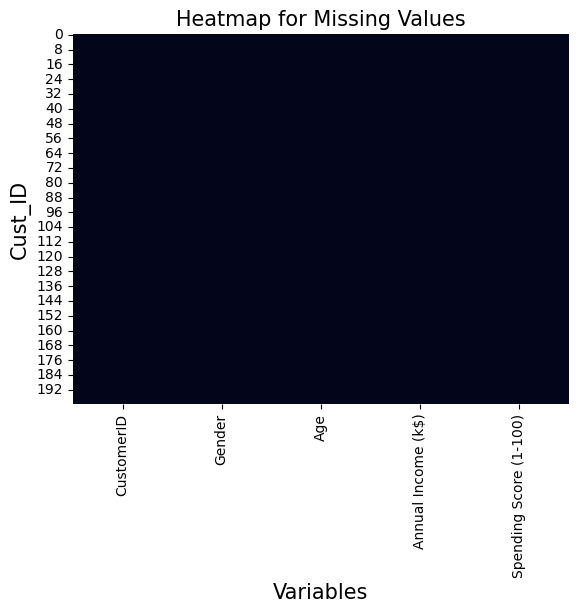

In [56]:
sns.heatmap(KM.isnull(), cbar=False)

plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Cust_ID', fontsize = 15)

plt.show()

#### Replace missing values in 'Gender'

In [57]:
KM= pd.get_dummies(KM,columns=['Gender']) 
KM.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


In [58]:
KM.shape

(200, 6)

In [59]:
KM.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64

## 5. Visualization

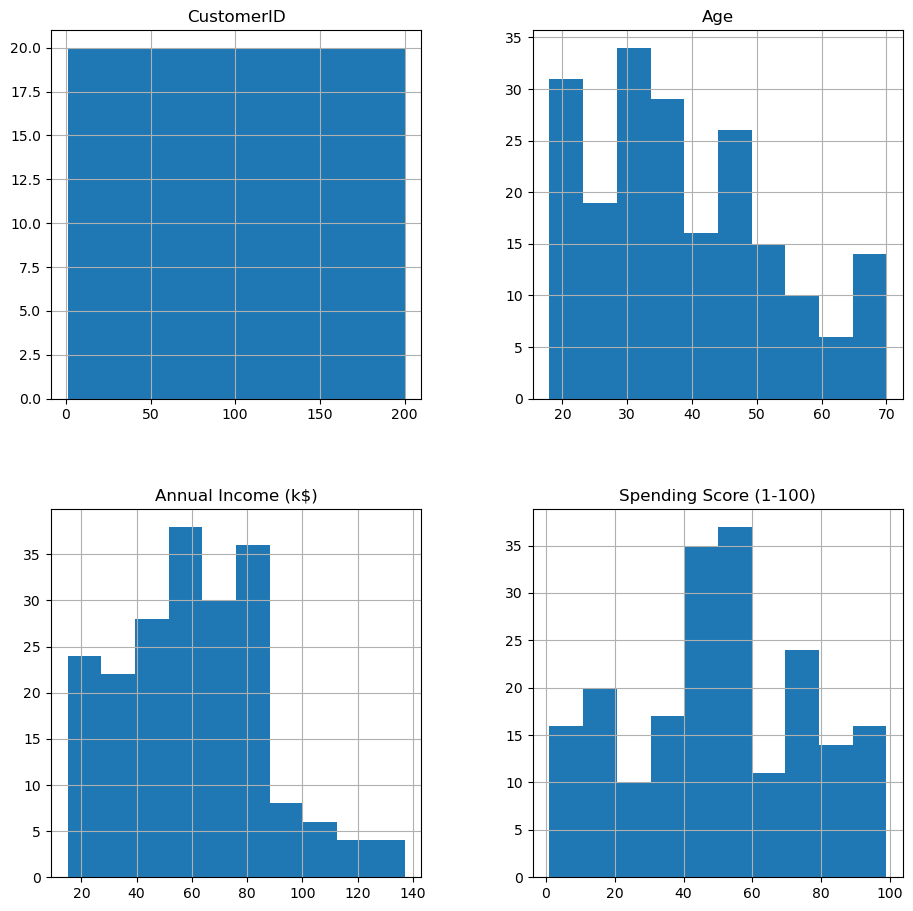

In [60]:
fig = KM.hist(figsize = (11,11))

##  Preprocess the data

In [65]:
# Select relevant features
features = KM[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## 3: Determine the optimal number of clusters (k)
 Use the elbow method to determine the optimal k



In [71]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.cluster import KMeans

C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

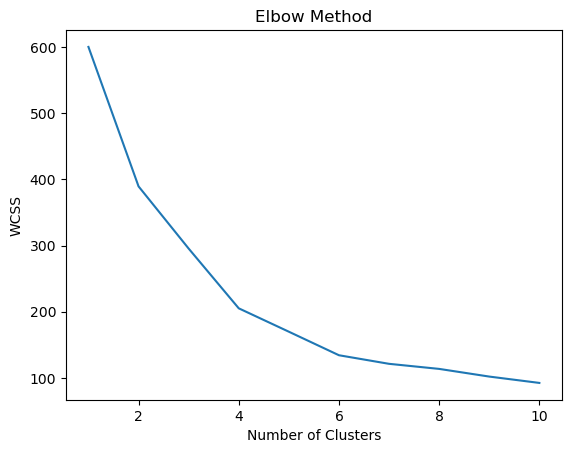

In [87]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, len(wcss) + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Apply k-means clustering
 Choose the optimal k based on the elbow method


In [88]:
k = 5  # Replace with the optimal k

In [90]:
# Create a k-means model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

In [91]:
# Fit the model to the scaled features
kmeans.fit(features_scaled)

C:\Users\sonic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [92]:
# Predict the cluster labels
labels = kmeans.labels_

In [93]:
# Predict the cluster labels
labels = kmeans.labels_

## Visualize the clusters

In [ ]:
# Use PCA to reduce the dimensionality to 2D

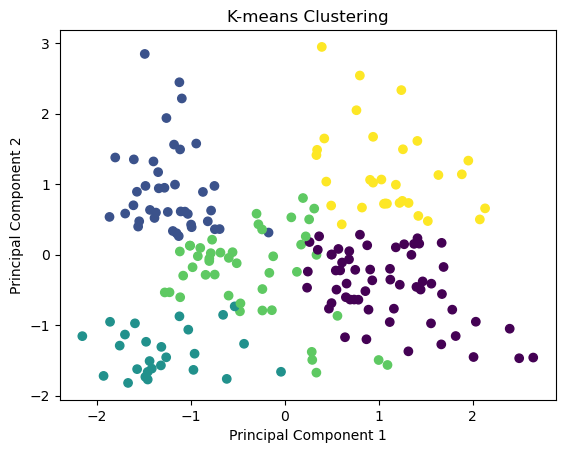

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clusters
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()